# Predicting Backorders MachineLearning: 

- **1 First Step**
    - 1.1 Load libraries and helper functions
    - 1.2 Load data
    - 1.3 Check the Memory Usage
    - 1.4 DataType Converting
    - 1.5 DateTime Parsing
- **2 Univariable Analysis**
    - 2.1 Categorical Analysis
    - 2.2 Target Value analysis
        - **A Review on Imbalanced Learning Methods**
     
    - 2.3 Missing Values Analysis
        - **Impute Missing Values**
    - 2.4 Imputation

- **3 Model selection using evaluation metrics**
    - 3.1 Hierarchy of sampling-based methods
    - 3.2 Cross-validation 






<b>Loading Important Libraries

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing important libraries of machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
#loading traing and test set
train = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 296.2+ MB


- To Reduce Memory Usage, It's necessary to do DataType Converting

In [30]:
for c, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[c] = train[c].astype(np.float32)
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float32(15), object(8)
memory usage: 199.6+ MB


In [31]:
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 42.5+ MB


## 2.1 Categorical Analysis

In [32]:
train[train.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [48]:
#define quantitative and categorical variable lists 
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

catpred=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop']

In [33]:
test[test.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,No,Yes,No,No,Yes,No,No
1,3285131,No,No,No,Yes,No,No,No
2,3285358,No,No,No,No,Yes,No,No
3,3285517,No,No,No,Yes,Yes,No,No
4,3285608,No,No,No,No,Yes,No,No


In [34]:
train.tail(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#removing last row because it containg most of the value blank
train.drop(train.index[-1], inplace=True)
test.drop(test.index[-1], inplace=True)

In [36]:
train.sku = train.sku.astype(np.int32)
test.sku = test.sku.astype(np.int32)

In [37]:
#Merging train and test data
merged_data=pd.concat([train,test])

In [38]:
merged_data.dtypes

sku                    int32
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [40]:
#basic data manupulation converting 'yes' and 'No' into binary 1 and 0
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
#"pd.factorize" Encode input values as an enumerated type or categorical variable    
    merged_data[col]=merged_data[col].apply(lambda  x: 1 if x=='Yes' else 0)

In [45]:
merged_data.head(5).transpose()

,0,1,2,3,4
sku,1026827.0,1043384.00,1043696.0,1043852.00,1044048.0
national_inv,0.0,2.00,2.0,7.00,8.0
lead_time,NaN,9.00,NaN,8.00,NaN
in_transit_qty,0.0,0.00,0.0,0.00,0.0
forecast_3_month,0.0,0.00,0.0,0.00,0.0
forecast_6_month,0.0,0.00,0.0,0.00,0.0
forecast_9_month,0.0,0.00,0.0,0.00,0.0
sales_1_month,0.0,0.00,0.0,0.00,0.0
sales_3_month,0.0,0.00,0.0,0.00,0.0
sales_6_month,0.0,0.00,0.0,0.00,0.0


In [44]:
#remove rows with all NA's use pd.notnull
#pd.notnull returns Array or bool indicating whether an object is not null or if an array
#is given which of the element is not null.
merged_data=merged_data[pd.notnull(merged_data['national_inv'])]
#Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged_data['perf_6_month_avg']=merged_data['perf_6_month_avg'].replace(-99, np.NaN)
merged_data['perf_12_month_avg']=merged_data['perf_12_month_avg'].replace(-99, np.NaN)

In [47]:
#missing value analysis
#View count/percentage of missing cells
tot=merged_data.isnull().sum().sort_values(ascending=False)
perc=(round(100*merged_data.isnull().sum()/merged_data.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
perf_6_month_avg,148579,7.7
perf_12_month_avg,140025,7.3
lead_time,115617,6.0
went_on_backorder,0,0.0
sales_6_month,0,0.0
national_inv,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0


### Creating an indicator or a feature indicating missing value and statistics

In [49]:
#create a variable for any missing data
merged_data['anymissing']=(  pd.isnull(merged_data['perf_6_month_avg'] ) | 
                        pd.isnull(merged_data['perf_12_month_avg'] ) | 
                        pd.isnull(merged_data['lead_time'] ) ).astype(int) 

'''
Compare complete data to data with any missing variables
Means of quantitative variables
Proportions of categorical variables
'''
merged_data.pivot_table(values=(quantvars),index=['anymissing'])
merged_data.pivot_table(values=(catvars),index=['anymissing'])

,deck_risk,oe_constraint,potential_issue,ppap_risk,rev_stop,stop_auto_buy,went_on_backorder
anymissing,,,,,,,
0,0.197284,0.000164,0.000539,0.116859,0.000237,0.976887,0.007538
1,0.565490,0.000000,0.000188,0.164115,0.002807,0.802321,0.003729


## 2.4 Imputation
### Common Imputed Methods
Imputing the missing value with median

In [51]:
merged_data=merged_data.fillna(merged_data.median(), inplace=True)

In [66]:
#Missing value
((merged_data.isnull().sum())/merged_data.shape[0])*100

national_inv         0.0
lead_time            0.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
anymissing           0.0
dtype: float64

## 2.2 Target Variable Analysis

In [56]:
merged_data['went_on_backorder'].value_counts()

0    1915954
1      13981
Name: went_on_backorder, dtype: int64

In [57]:
#Dropping the column not useful for analysis
merged_data=merged_data.drop(['sku'],axis=1)

<h4>Dimensionality reduction

<b>Correlation analysis continuous variables</b>

In [88]:
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']
continuos_variable=pd.DataFrame(merged_data,columns=quantvars)

In [91]:
continuos_variable.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.081328,0.080423,0.155753,0.191604,0.224305,0.239924,0.405298,0.030307,0.003901,0.002719,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.008506,-0.008767,-0.005748,-0.006739,-0.007131,-0.007274,-0.007075,-0.001563,-0.006952,-0.005070,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.667614,0.661650,0.622062,0.687824,0.676524,0.645470,0.742187,0.161349,0.004295,0.001414,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.988112,0.971443,0.688490,0.764681,0.817126,0.809634,0.719626,0.359632,0.006065,0.002964,0.043872
forecast_6_month,0.081328,-0.008506,0.667614,0.988112,1.000000,0.994281,0.709730,0.799705,0.858822,0.852034,0.736929,0.367494,0.006899,0.003348,0.044063
forecast_9_month,0.080423,-0.008767,0.661650,0.971443,0.994281,1.000000,0.725149,0.823402,0.885969,0.879327,0.735548,0.373258,0.007231,0.003430,0.044010
sales_1_month,0.155753,-0.005748,0.622062,0.688490,0.709730,0.725149,1.000000,0.918282,0.873111,0.824634,0.769847,0.260607,0.006328,0.002052,0.065749
sales_3_month,0.191604,-0.006739,0.687824,0.764681,0.799705,0.823402,0.918282,1.000000,0.975437,0.930531,0.854285,0.314536,0.006882,0.002056,0.068080
sales_6_month,0.224305,-0.007131,0.676524,0.817126,0.858822,0.885969,0.873111,0.975437,1.000000,0.973871,0.838836,0.334398,0.006958,0.001831,0.056219
sales_9_month,0.239924,-0.007274,0.645470,0.809634,0.852034,0.879327,0.824634,0.930531,0.973871,1.000000,0.804336,0.329906,0.007207,0.002144,0.048616


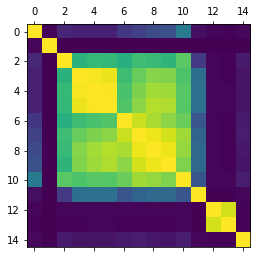

In [137]:
#Correlation table
plt.matshow(continuos_variable.corr())
plt.show()

From Correlation table we find that<br>
Feature forecast_3_month,forecast_6_month,forecast_9_month are highly correlated<br>
perf_6_month_avg,perf_12_month_avg are highly correlated<br>
sales_1_month,sales_3_month,sales_6_month,sales_9_month are correlated<br>


<b>Colinearity</b> is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In python this can by accomplished by using numpy's corrcoef function.<br>

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.<br>

A common R function used for testing regression assumptions and specifically multicolinearity is "VIF()" and unlike many statistical concepts, its formula is straightforward:<br>

V.I.F. = 1 / (1 - R^2)<br>

The <b>Variance Inflation Factor (VIF)</b> is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [104]:
#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuos_variable.values, i) for i in range(continuos_variable.shape[1])]
vif["features"] = continuos_variable.columns

In [114]:
vif 

,VIF Factor,features
0,1.845352,national_inv
1,2.114718,lead_time
2,2.866972,in_transit_qty
3,87.633362,forecast_3_month
4,492.922128,forecast_6_month
5,275.176237,forecast_9_month
6,7.096840,sales_1_month
7,55.142726,sales_3_month
8,101.114513,sales_6_month
9,22.944864,sales_9_month


In [121]:
#Removing perf_12_month_avg
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg'],axis=1)
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_1["features"] = continuos_variable_1.columns

In [123]:
vif_1

,VIF Factor,features
0,1.845335,national_inv
1,2.103110,lead_time
2,2.866946,in_transit_qty
3,87.632253,forecast_3_month
4,492.917385,forecast_6_month
5,275.173623,forecast_9_month
6,7.096836,sales_1_month
7,55.142069,sales_3_month
8,101.112074,sales_6_month
9,22.944864,sales_9_month


In [124]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month'],axis=1)
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_2["features"] = continuos_variable_1.columns

In [125]:
vif_2

,VIF Factor,features
0,1.844470,national_inv
1,2.103109,lead_time
2,2.654278,in_transit_qty
3,27.299326,forecast_3_month
4,49.529381,forecast_9_month
5,7.091127,sales_1_month
6,55.065493,sales_3_month
7,99.944894,sales_6_month
8,22.944840,sales_9_month
9,7.015119,min_bank


In [126]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month'],axis=1)
vif_3 = pd.DataFrame()
vif_3["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_3["features"] = continuos_variable_1.columns

In [127]:
vif_3

,VIF Factor,features
0,1.725577,national_inv
1,2.103006,lead_time
2,2.583366,in_transit_qty
3,4.105479,forecast_3_month
4,7.010137,sales_1_month
5,49.340089,sales_3_month
6,75.348014,sales_6_month
7,22.942683,sales_9_month
8,6.920735,min_bank
9,1.180907,pieces_past_due


In [128]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month"],axis=1)
vif_4 = pd.DataFrame()
vif_4["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_4["features"] = continuos_variable_1.columns

In [129]:
vif_4

,VIF Factor,features
0,1.721171,national_inv
1,2.102998,lead_time
2,2.583047,in_transit_qty
3,4.102966,forecast_3_month
4,7.009569,sales_1_month
5,45.919017,sales_3_month
6,34.040760,sales_6_month
7,6.920099,min_bank
8,1.180892,pieces_past_due
9,2.105892,perf_6_month_avg


In [130]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month"],axis=1)
vif_5 = pd.DataFrame()
vif_5["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_5["features"] = continuos_variable_1.columns

In [131]:
vif_5

,VIF Factor,features
0,1.527560,national_inv
1,2.102986,lead_time
2,2.582870,in_transit_qty
3,2.818817,forecast_3_month
4,6.466516,sales_1_month
5,10.925490,sales_3_month
6,6.562656,min_bank
7,1.180610,pieces_past_due
8,2.105762,perf_6_month_avg
9,1.006627,local_bo_qty


In [132]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'],axis=1)
vif_6 = pd.DataFrame()
vif_6["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_6["features"] = continuos_variable_1.columns

In [133]:
vif_6

,VIF Factor,features
0,1.525936,national_inv
1,2.102985,lead_time
2,2.582322,in_transit_qty
3,2.816367,forecast_3_month
4,4.738734,sales_3_month
5,6.556546,min_bank
6,1.174795,pieces_past_due
7,2.105754,perf_6_month_avg
8,1.006557,local_bo_qty


In [134]:
continuos_variable_1.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.191604,0.405298,0.030307,0.003901,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.006739,-0.007075,-0.001563,-0.006952,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.687824,0.742187,0.161349,0.004295,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.764681,0.719626,0.359632,0.006065,0.043872
sales_3_month,0.191604,-0.006739,0.687824,0.764681,1.000000,0.854285,0.314536,0.006882,0.068080
min_bank,0.405298,-0.007075,0.742187,0.719626,0.854285,1.000000,0.262834,0.010274,0.071582
pieces_past_due,0.030307,-0.001563,0.161349,0.359632,0.314536,0.262834,1.000000,-0.004457,0.009388
perf_6_month_avg,0.003901,-0.006952,0.004295,0.006065,0.006882,0.010274,-0.004457,1.000000,0.002165
local_bo_qty,0.012814,-0.001578,0.063223,0.043872,0.068080,0.071582,0.009388,0.002165,1.000000


<b>Data After dim_reduction

In [136]:
Final_red_data=merged_data.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'],axis=1)

In [138]:
Final_red_data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,anymissing
0,0.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,0,0,0,1,0,0,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.0,0,0,0,1,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,1,0,0,1,0,0,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.0,0,0,0,1,0,0,0
4,8.0,8.0,0.0,0.0,0.0,2.0,0,0.0,0.85,0.0,1,0,0,1,0,0,1


##  A Review on Imbalanced Learning Methods

### Introuction
- Imbalanced classification is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems. The reasons which leads to reduction in **accuracy** of ML algorithms on imbalanced data sets:

    1. ML algorithms struggle with accuracy because of the unequal distribution in dependent variable.
    2. This causes the performance of existing classifiers to get biased towards majority class.
    3. The algorithms are accuracy driven i.e. they aim to minimize the overall error to which the minority class contributes very little.
    4. ML algorithms assume that the data set has balanced class distributions.
    5. They also assume that errors obtained from different classes have same cost

In [59]:
#Splitting the data into training as well as testing set
X, y = merged_data.drop(['went_on_backorder'],axis=1), merged_data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(merged_data.shape)
print(len(X_train)+len(X_test))

(1447451, 22)
(482484, 22)
(1447451,)
(482484,)
(1929935, 23)
1929935


<b>Checking the accuracy if we predict all the products are not on bacorder that is class 0

In [64]:
from sklearn.dummy import DummyClassifier
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority.score(X_test, y_test)

0.99279561602042765

We get the accuracy very high but it is unable to predict the product which is on backorder(Class 1).

# Model selection using evaluation metrics

 ## _K_-Fold Cross Validation
In  _K_-fold cross-validation (CV), we randomly split the training dataset into  _K_
  folds without replacement, where  _K−1_
  folds are used for the model training and the remaining 1 fold is for testing. This procedure is repeated  _K_
  times so that we obtain  _K_
  models and  _K_ performance estimates. Then we take their **average** as the final performance estimate.


###  Hierarchy of sampling-based methods.
1. Under-sampling

 Under-sampling methods reduces the number of samples from the majority class in order to balance between majority and minority classes. However, the main drawback of under-sampling is that it may miss some important infomations.
    
2. Oversampling

 On the opposite of **Under-sampling**, Oversampling methods add the samples to original imbalanced data set.
    - <b>Pros:</b> Leads to no information loss. 
    - <b>Cons:</b> Oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting. Although, the training accuracy of such data set will be high, but the accuracy on unseen data will be worse.



<h3>Average Sampling simply implement by scikit-learn</h3>
Scikit-Learn provide [**StratifiedShuffleSplit**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) API by preserving the percentage of samples for each class.

-This cross-validation object is a merge of **StratifiedKFold** and **ShuffleSplit**, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.<br>
-Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.<br><b>Example:</b><br>we have a dataset with 80 class 0 records and 20 class 1 records. We may gain a mean response value of (80*0+20*1)/100 = 0.2 and we want 0.2 to be the mean response value of all folds. This is also a quick way in EDA to measure if the dataset given is imbalanced instead of counting.

<b>There are two type of data:</b><br>
1. Merged_data: It contains full feature that is 22 covariates<br>
2. Final_red_data: It contains less features obtained from revoving colliniarity 

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier

<b>Average sampling in merged_data

In [68]:
X = merged_data.drop('went_on_backorder', axis=1).values
y = merged_data['went_on_backorder'].values
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)

10

In [69]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [75]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
print(X_train.shape,X_test.shape,len(y_train),len(y_test))

1350954 578981 1350954 578981
(1350954, 22) (578981, 22) 1350954 578981


<b>For Feature selected data

In [139]:
x_final = Final_red_data.drop('went_on_backorder', axis=1).values
y_final = Final_red_data['went_on_backorder'].values
ss_final = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
ss_final.get_n_splits(x_final, y_final)
for train_index, test_index in sss.split(x_final, y_final):
    x_train_final, x_test_final = x_final[train_index], x_final[test_index]
    y_train_final, y_test_final = y_final[train_index], y_final[test_index]
print(len(x_train_final),len(x_test_final),len(y_train_final),len(y_test_final))
print(x_train_final.shape,x_test_final.shape,len(y_train_final),len(y_test_final))

1350954 578981 1350954 578981
(1350954, 16) (578981, 16) 1350954 578981


# Modeling

###  Evaluation Metric: ROC curves, Area-Under-Curve (AUC)<br>
###  Precision recall curve

#### optimised Random Forest

<b>For Full Features

Tuning random forest

MaxDepth = 2.00  accuracy = 0.99   AUC = 0.8869
MaxDepth = 4.00  accuracy = 0.99   AUC = 0.9030
MaxDepth = 6.00  accuracy = 0.99   AUC = 0.9196
MaxDepth = 8.00  accuracy = 0.99   AUC = 0.9246
MaxDepth = 10.00  accuracy = 0.99   AUC = 0.9351
MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9519
MaxDepth = 20.00  accuracy = 0.99   AUC = 0.9376


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


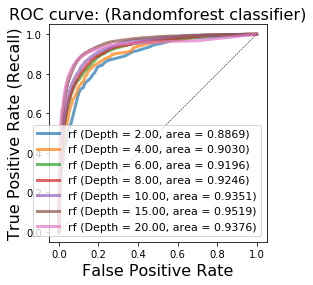

In [77]:
for g in [2, 4, 6,8,10,15,20]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train, y_train)
    y_score_rf = rf.predict_proba(X_test)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test, y_test)
    print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Optimised Random Forest
MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9519

<b>For Feature selected data

MaxDepth = 2.00  accuracy = 0.99   AUC = 0.8688
MaxDepth = 4.00  accuracy = 0.99   AUC = 0.9019
MaxDepth = 6.00  accuracy = 0.99   AUC = 0.9151
MaxDepth = 8.00  accuracy = 0.99   AUC = 0.9239
MaxDepth = 10.00  accuracy = 0.99   AUC = 0.9318
MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9443
MaxDepth = 20.00  accuracy = 0.99   AUC = 0.9303


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


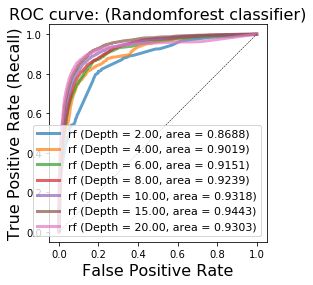

In [140]:
for g in [2, 4, 6,8,10,15,20]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(x_train_final, y_train_final)
    y_score_rf = rf.predict_proba(x_test_final)
    fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(x_test_final, y_test_final)
    print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

optimised parameter:MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9443

<b>training using optimised parameter

In [273]:
%%time
rf = RandomForestClassifier(max_depth=15,random_state=0).fit(x_train_final, y_train_final)
y_score_rf = rf.predict_proba(x_test_final)

Wall time: 1min 52s


0.992965226838
0.944309896666
MaxDepth = 15.0000  accuracy = 0.9930   AUC = 0.9443


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


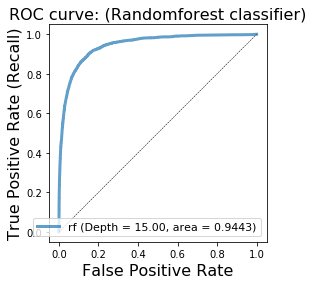

In [275]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_score_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = rf.score(x_test_final, y_test_final)
print(accuracy_rf)
print(roc_auc_rf)
print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(15, accuracy_rf, roc_auc_rf))
plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(15, roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.27


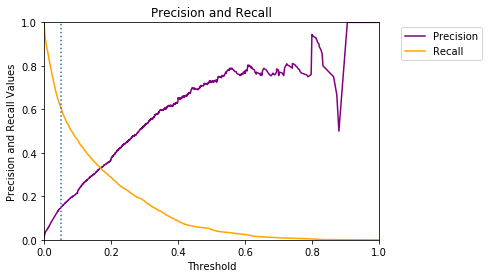

In [276]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_rf[:,1])
average_precision = average_precision_score(y_test_final, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [277]:
y_prob_test=pd.DataFrame(y_score_rf[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          560095  14692   574787
1            1640   2554     4194
__all__    561735  17246   578981


In [279]:
print("recall",2554/4194)
print("precision",2554/17246)

recall 0.60896518836433
precision 0.14809231126058217


<b>For Full Feature

<b>training using optimised feature

MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9519


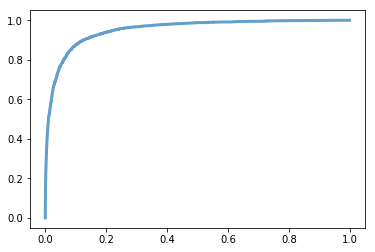

0.993037768079
0.95187739857
Wall time: 2min 26s


In [82]:
%%time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
rf = RandomForestClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
y_score_rf = rf.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = rf.score(X_test, y_test)
print(accuracy_rf)
print(roc_auc_rf)

MaxDepth = 15.00  accuracy = 0.99   AUC = 0.9519


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


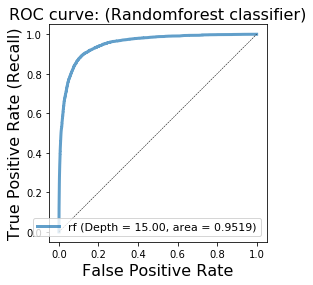

In [83]:
print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(15, accuracy_rf, roc_auc_rf))
plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(15, roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.31


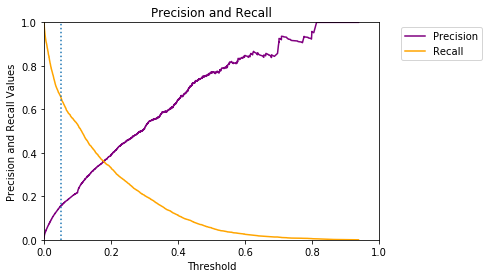

In [84]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_rf[:,1])
average_precision = average_precision_score(y_test, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [85]:
y_prob_test=pd.DataFrame(y_score_rf[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          559869  14918   574787
1            1442   2752     4194
__all__    561311  17670   578981


In [156]:
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0    1  __all__
Actual                         
0          574710   77   574787
1            3993  201     4194
__all__    578703  278   578981


In [86]:
#Recall
2752/4194

0.6561754887935145

In [87]:
#Precision
2752/14918

0.184475130714573

# CART(Classification and Regression Tree)

In [145]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Tuning Decision Tree

#### For Full Feature

min_samples_split = 200.0000  accuracy = 0.9927   AUC = 0.8831
min_samples_split = 250.0000  accuracy = 0.9927   AUC = 0.8924
min_samples_split = 300.0000  accuracy = 0.9927   AUC = 0.8977
min_samples_split = 400.0000  accuracy = 0.9928   AUC = 0.9076
min_samples_split = 500.0000  accuracy = 0.9928   AUC = 0.9122
min_samples_split = 600.0000  accuracy = 0.9927   AUC = 0.9188
min_samples_split = 700.0000  accuracy = 0.9927   AUC = 0.9206
min_samples_split = 800.0000  accuracy = 0.9927   AUC = 0.9222
min_samples_split = 900.0000  accuracy = 0.9927   AUC = 0.9234
min_samples_split = 1000.0000  accuracy = 0.9927   AUC = 0.9247


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


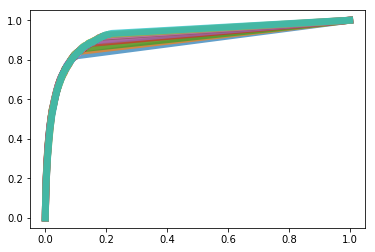

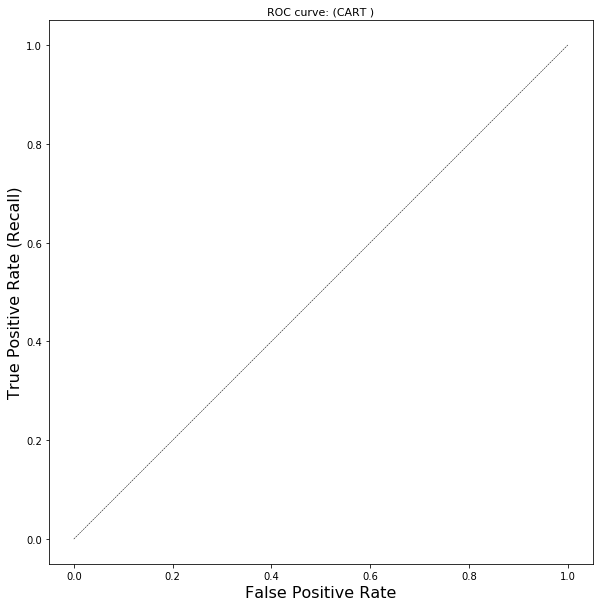

In [253]:
for g in [200,250,300,400,500,600,700,800,900,1000]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=g, random_state=0).fit(X_train, y_train)
    y_score_dt = dt.predict_proba(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("min_samples_split = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=7, alpha=0.7, 
             label='rf (min_samples_split = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_dt))

plt.figure(figsize=(12,10))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

min_samples_split = 1000.0000  max_depth=2.0000 accuracy = 0.9928   AUC = 0.8270
min_samples_split = 1000.0000  max_depth=4.0000 accuracy = 0.9928   AUC = 0.8916
min_samples_split = 1000.0000  max_depth=6.0000 accuracy = 0.9928   AUC = 0.9155
min_samples_split = 1000.0000  max_depth=8.0000 accuracy = 0.9928   AUC = 0.9236
min_samples_split = 1000.0000  max_depth=10.0000 accuracy = 0.9928   AUC = 0.9298
min_samples_split = 1000.0000  max_depth=12.0000 accuracy = 0.9928   AUC = 0.9318
min_samples_split = 1000.0000  max_depth=15.0000 accuracy = 0.9927   AUC = 0.9298
min_samples_split = 1000.0000  max_depth=20.0000 accuracy = 0.9927   AUC = 0.9257


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


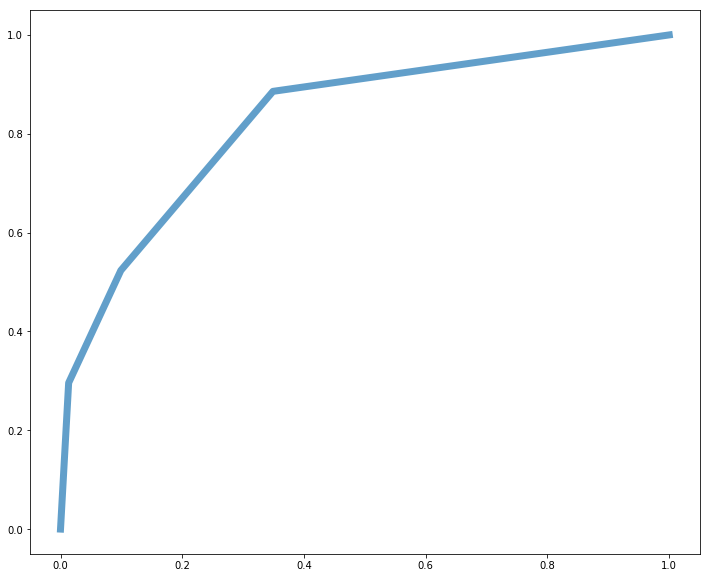

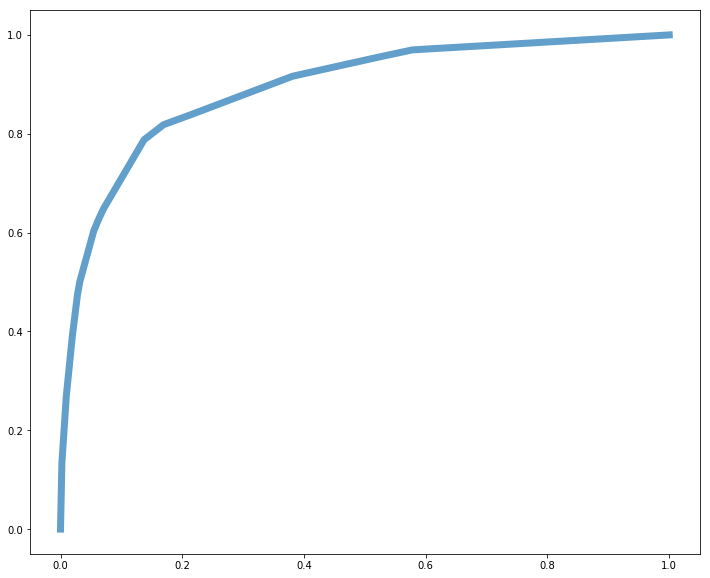

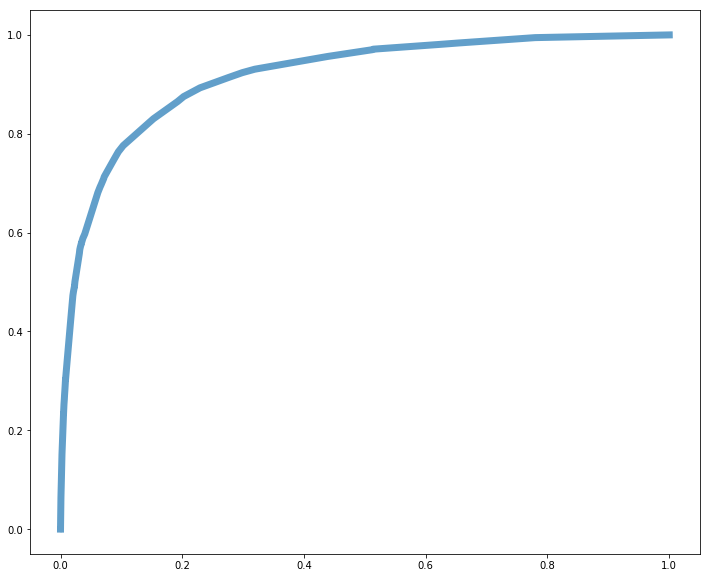

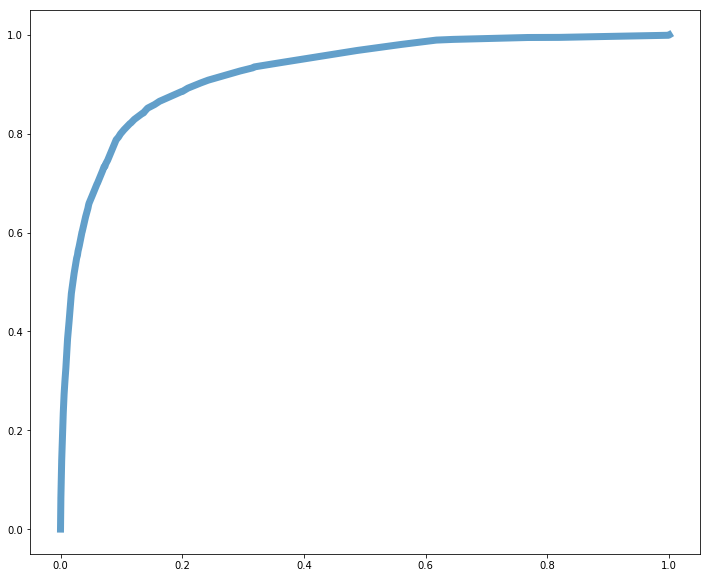

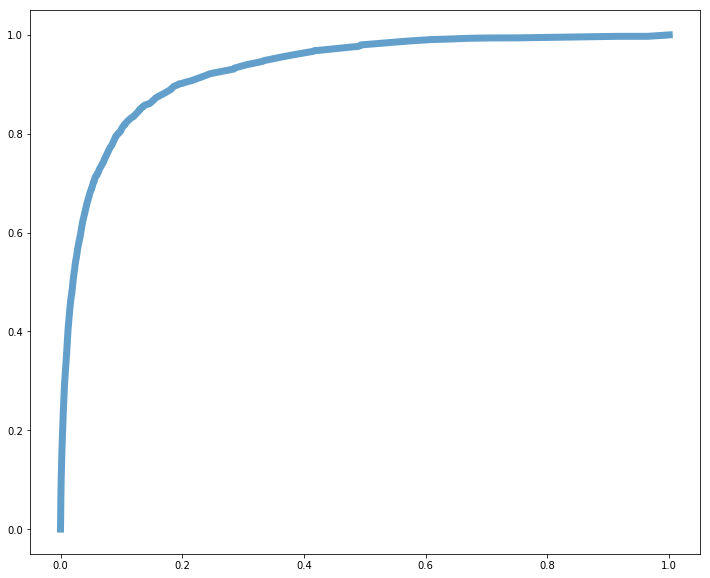

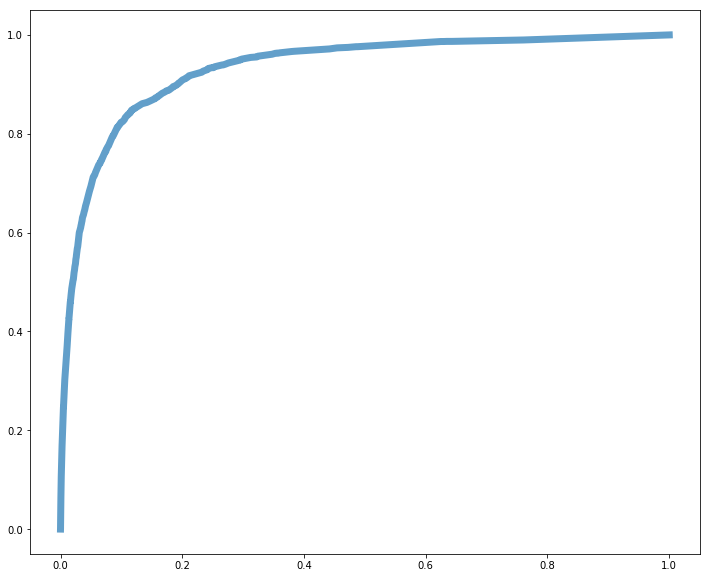

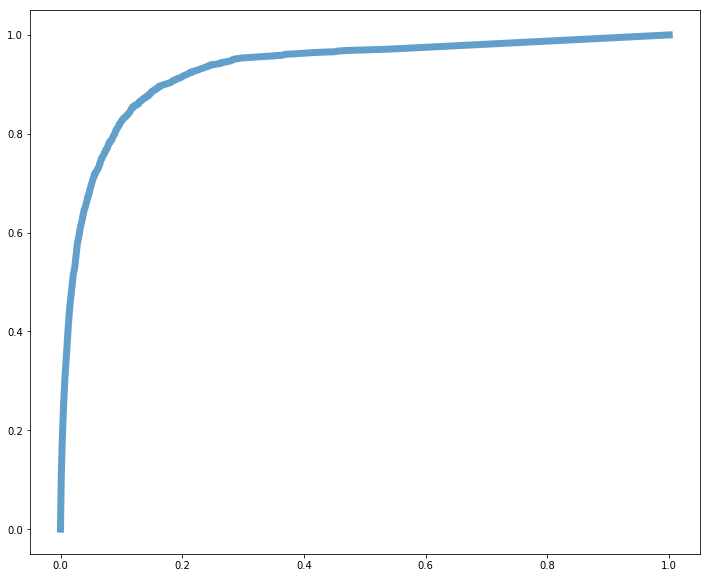

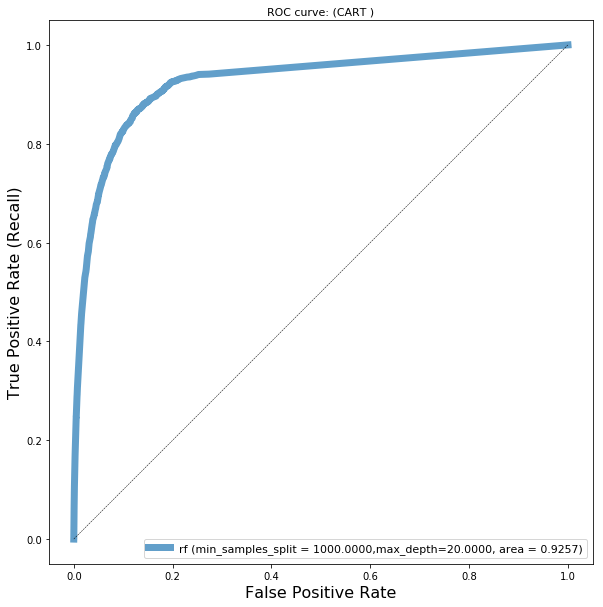

Wall time: 5min 39s


In [254]:
%%time
for g in [2,4,6,8,10,12,15,20]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000,max_depth=g,random_state=0).fit(X_train, y_train)
    y_score_dt = dt.predict_proba(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("min_samples_split = {:.4f}  max_depth={:.4f} accuracy = {:.4f}   AUC = {:.4f}".format(1000,g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=4, alpha=0.7, 
             label='dt (min_samples_split = {:0.4f},max_depth={:.4f}, area = {:0.4f})'.format(1000,g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

## Training Tuned Decision Tree

In [257]:
%%time
#optimised tree training
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000,max_depth=12, random_state=0).fit(X_train, y_train)
y_score_dt = dt.predict_proba(X_test)

Wall time: 52.8 s


In [259]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
accuracy_dt = dt.score(X_test, y_test)
print(accuracy_dt)
print(roc_auc_dt)
print("min_samples_split = {:.4f}  accuracy = {:.4f}  max_depth={:.4f} AUC = {:.4f}".format(1000, accuracy_dt,12, roc_auc_dt))

0.992751057461
0.931776163731
min_samples_split = 1000.0000  accuracy = 0.9928  max_depth=12.0000 AUC = 0.9318


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


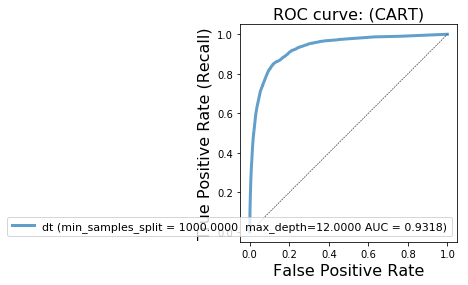

In [260]:
plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, label='dt (min_samples_split = {:.4f}  max_depth={:.4f} AUC = {:.4f})'.format(1000,12, roc_auc_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision-recall score: 0.18


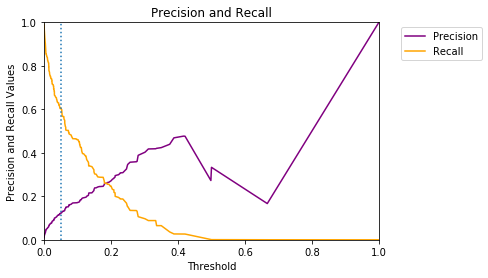

In [261]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_dt[:,1])
average_precision = average_precision_score(y_test, y_score_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [262]:
y_prob_test=pd.DataFrame(y_score_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          556591  18196   574787
1            1663   2531     4194
__all__    558254  20727   578981


In [263]:
print('precision:',(2531/20727))
print('recall',(2531/4194))

precision: 0.12211125584985767
recall 0.6034811635670004


<b>For Feature Selected data

min_samples_split = 200.0000  accuracy = 0.9927   AUC = 0.8877
min_samples_split = 250.0000  accuracy = 0.9927   AUC = 0.8955
min_samples_split = 300.0000  accuracy = 0.9927   AUC = 0.9026
min_samples_split = 400.0000  accuracy = 0.9927   AUC = 0.9103
min_samples_split = 500.0000  accuracy = 0.9927   AUC = 0.9158
min_samples_split = 600.0000  accuracy = 0.9927   AUC = 0.9193
min_samples_split = 700.0000  accuracy = 0.9927   AUC = 0.9211
min_samples_split = 800.0000  accuracy = 0.9927   AUC = 0.9218
min_samples_split = 900.0000  accuracy = 0.9927   AUC = 0.9229
min_samples_split = 1000.0000  accuracy = 0.9927   AUC = 0.9243


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


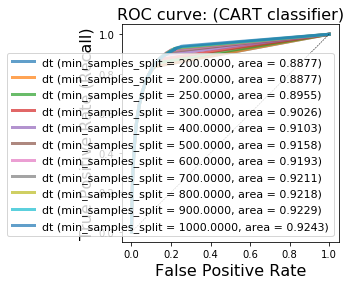

In [265]:
for g in [200,250,300,400,500,600,700,800,900,1000]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=g, random_state=0).fit(x_train_final, y_train_final)
    y_score_dt = dt.predict_proba(x_test_final)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(x_test_final, y_test_final)
    print("min_samples_split = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='dt (min_samples_split = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

min_samples_split = 1000.0000  max_depth=2.0000 accuracy = 0.9928   AUC = 0.8270
min_samples_split = 1000.0000  max_depth=4.0000 accuracy = 0.9928   AUC = 0.8918
min_samples_split = 1000.0000  max_depth=6.0000 accuracy = 0.9928   AUC = 0.9124
min_samples_split = 1000.0000  max_depth=8.0000 accuracy = 0.9928   AUC = 0.9216
min_samples_split = 1000.0000  max_depth=10.0000 accuracy = 0.9927   AUC = 0.9267
min_samples_split = 1000.0000  max_depth=12.0000 accuracy = 0.9927   AUC = 0.9324
min_samples_split = 1000.0000  max_depth=15.0000 accuracy = 0.9927   AUC = 0.9294
min_samples_split = 1000.0000  max_depth=20.0000 accuracy = 0.9927   AUC = 0.9244


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


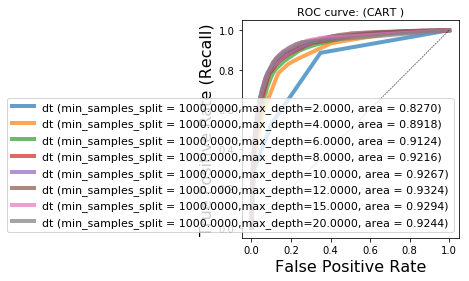

Wall time: 3min 17s


In [266]:
%%time
for g in [2,4,6,8,10,12,15,20]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000,max_depth=g,random_state=0).fit(x_train_final, y_train_final)
    y_score_dt = dt.predict_proba(x_test_final)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(x_test_final, y_test_final)
    print("min_samples_split = {:.4f}  max_depth={:.4f} accuracy = {:.4f}   AUC = {:.4f}".format(1000,g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=4, alpha=0.7, 
             label='dt (min_samples_split = {:0.4f},max_depth={:.4f}, area = {:0.4f})'.format(1000,g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

In [267]:
%%time
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000, max_depth=12,random_state=0).fit(x_train_final, y_train_final)
y_score_dt = dt.predict_proba(x_test_final)

Wall time: 30 s


In [281]:
dt.feature_importances_

array([ 0.24372673,  0.01513048,  0.10782048,  0.17354112,  0.34516008,
        0.03036665,  0.00082442,  0.00569281,  0.0355801 ,  0.01829051,
        0.01273054,  0.00157649,  0.00122124,  0.00171103,  0.        ,
        0.00662731])

0.992737240082
0.932350940726
min_samples_split = 1000.0000  max_depth=12.0000 accuracy = 0.9927   AUC = 0.9324


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


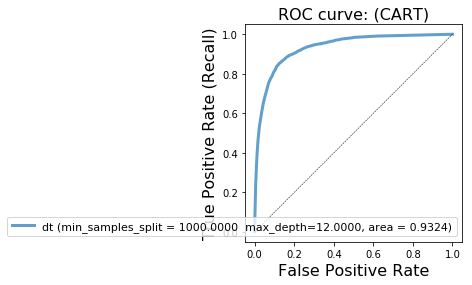

In [271]:
fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
accuracy_dt = dt.score(x_test_final, y_test_final)
print(accuracy_dt)
print(roc_auc_dt)
print("min_samples_split = {:.4f}  max_depth={:.4f} accuracy = {:.4f}   AUC = {:.4f}".format(1000,12, accuracy_dt, roc_auc_dt))
plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, label='dt (min_samples_split = {:.4f}  max_depth={:.4f}, area = {:0.4f})'.format(1000,12, roc_auc_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.17


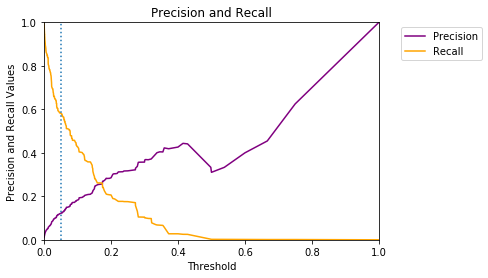

In [269]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_dt[:,1])
average_precision = average_precision_score(y_test_final, y_score_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [270]:
y_prob_test=pd.DataFrame(y_score_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          557149  17638   574787
1            1754   2440     4194
__all__    558903  20078   578981


In [272]:
print('recall:',2440/4194)
print('precision',2440/20078)

recall: 0.5817835002384358
precision 0.12152604841119634


# AdaboostClassifiers

<b>Tuned Adaboost

In [280]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

<b>For Full Data

learning_rate = 0.0010  accuracy = 0.9928   AUC = 0.7121
learning_rate = 0.0100  accuracy = 0.9928   AUC = 0.8356
learning_rate = 0.1000  accuracy = 0.9928   AUC = 0.9086
learning_rate = 0.5000  accuracy = 0.9926   AUC = 0.9269
learning_rate = 1.0000  accuracy = 0.9925   AUC = 0.9284


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


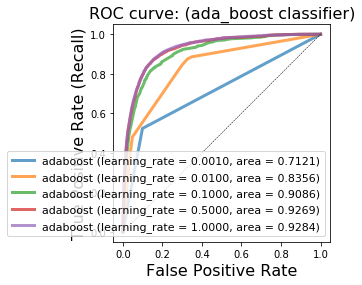

In [282]:
for g in [0.001,0.01,0.1,0.5,1]:
    ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=g, 
                              algorithm='SAMME.R', random_state=None).fit(X_train, y_train)
    y_score_ada_dt = ada_dt.predict_proba(X_test)
    fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
    roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
    accuracy_ada_dt = ada_dt.score(X_test, y_test)
    print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
    plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='adaboost (learning_rate = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [288]:
%%time
#optimised adaboosted tree training
ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.5, 
                              algorithm='SAMME.R', random_state=None).fit(X_train, y_train)
y_score_ada_dt = ada_dt.predict_proba(X_test)

Wall time: 4min 50s


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


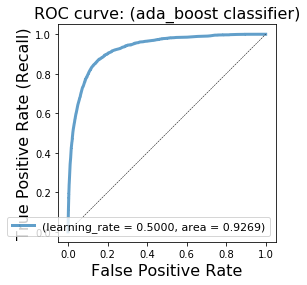

In [291]:
fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
accuracy_ada_dt = ada_dt.score(X_test, y_test)

plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='(learning_rate = {:0.4f}, area = {:0.4f})'.format(0.5, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.1434 


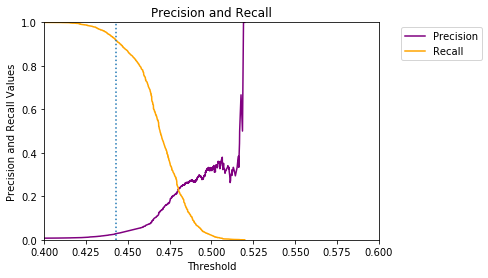

In [294]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_ada_dt[:,1])
average_precision = average_precision_score(y_test, y_score_ada_dt[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.443,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0.4,0.6])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [183]:
y_score_ada_dt[:,1]

array([ 0.42697322,  0.40815834,  0.41487211, ...,  0.45367938,
        0.44227576,  0.41025363])

In [296]:
y_prob_test=pd.DataFrame(y_score_ada_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.45 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          488236  86551   574787
1             555   3639     4194
__all__    488791  90190   578981


In [298]:
print('recall',3639/4194)

recall 0.8676680972818311


<b>For Feature selected data

learning_rate = 0.0010  accuracy = 0.9928   AUC = 0.7121
learning_rate = 0.0100  accuracy = 0.9928   AUC = 0.8356
learning_rate = 0.1000  accuracy = 0.9928   AUC = 0.9053
learning_rate = 0.5000  accuracy = 0.9926   AUC = 0.9237
learning_rate = 1.0000  accuracy = 0.9926   AUC = 0.9251


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


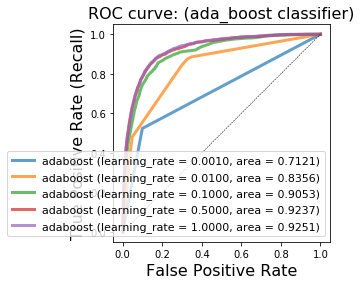

In [297]:
for g in [0.001,0.01,0.1,0.5,1]:
    ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=g, 
                              algorithm='SAMME.R', random_state=None).fit(x_train_final, y_train_final)
    y_score_ada_dt = ada_dt.predict_proba(x_test_final)
    fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test_final, y_score_ada_dt[:,1])
    roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
    accuracy_ada_dt = ada_dt.score(x_test_final, y_test)
    print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
    plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='adaboost (learning_rate = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [299]:
%%time
ada_dt =AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.1, 
                              algorithm='SAMME.R', random_state=None).fit(x_train_final, y_train_final)
y_score_ada_dt = ada_dt.predict_proba(x_test_final)

Wall time: 4min 59s


0.992756238978
0.90528535333
learning_rate = 0.1000  accuracy = 0.9928   AUC = 0.9053


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


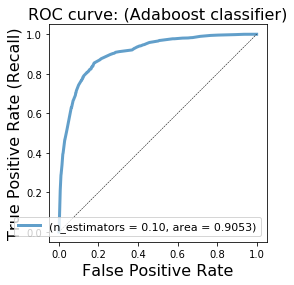

In [300]:
fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test_final, y_score_ada_dt[:,1])
roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
accuracy_ada_dt = ada_dt.score(x_test_final, y_test_final)
print(accuracy_ada_dt)
print(roc_auc_ada_dt)
print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.1, accuracy_ada_dt, roc_auc_ada_dt))
plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, label='(n_estimators = {:0.2f}, area = {:0.4f})'.format(0.1, roc_auc_ada_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Adaboost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.1021


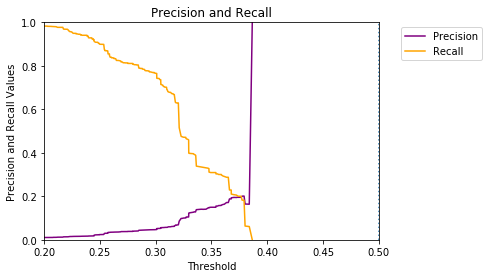

In [304]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_ada_dt[:,1])
average_precision = average_precision_score(y_test_final, y_score_ada_dt[:,1])
print('Average precision-recall score: {0:0.4f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0.2,.5])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [305]:
y_prob_test=pd.DataFrame(y_score_ada_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.3 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          509436  65351   574787
1             981   3213     4194
__all__    510417  68564   578981


In [217]:
#precision
print('precision:',3207/65092)

precision: 0.049268727339765256


In [218]:
#Recall
print('recall',3207/4194)

recall 0.7646638054363376


<h1>Optimised Logistic Regression</h1>

<b>for merged data

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


MaxDepth = 0.0100  accuracy = 0.6196   AUC = 0.9044
MaxDepth = 0.0010  accuracy = 0.4872   AUC = 0.8951
MaxDepth = 0.0500  accuracy = 0.7185   AUC = 0.9008
MaxDepth = 0.1000  accuracy = 0.7966   AUC = 0.8919
MaxDepth = 0.5000  accuracy = 0.9137   AUC = 0.8822
MaxDepth = 1.0000  accuracy = 0.9609   AUC = 0.8117


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


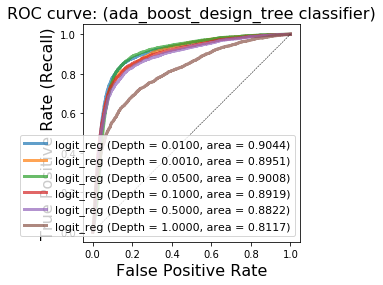

Wall time: 1h 51min 32s


In [177]:
%%time
for c in [0.01,0.001,0.05,0.1,0.5,1]:#iterating using maxdepth
    logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight="balanced",dual=True).fit(X_train, y_train)
    y_score_logit_reg = logit_reg.predict_proba(X_test)
    fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
    roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
    accuracy_logit_reg = logit_reg.score(X_test, y_test)
    print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
    plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(c,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_logit_classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [219]:
%%time
#optimised log_reg training
logit_reg = LogisticRegression(penalty = 'l2', C = 0.05,class_weight="balanced",dual=True).fit(X_train, y_train)
y_score_logit_reg = logit_reg.predict_proba(X_test)
fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
accuracy_logit_reg = logit_reg.score(X_test, y_test)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Wall time: 16min 52s


C= 0.0500  accuracy = 0.7408   AUC = 0.8836


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


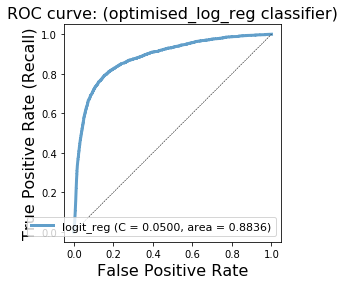

In [220]:
print("C= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.05, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(0.05,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_log_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.0736 


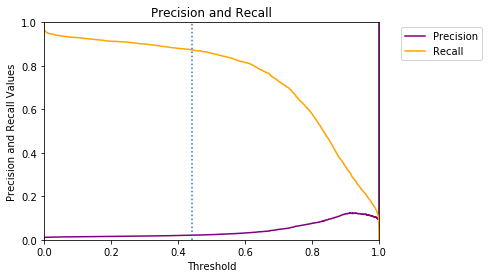

In [221]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test, y_score_logit_reg[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.443,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [222]:
y_prob_test=pd.DataFrame(y_score_logit_reg[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.443 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0       1  __all__
Actual                            
0          404574  170213   574787
1             531    3663     4194
__all__    405105  173876   578981


<b>For Uncorrelated Data

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


C = 0.0100  accuracy = 0.5504   AUC = 0.9010
C = 0.0500  accuracy = 0.6588   AUC = 0.8942
C = 0.1000  accuracy = 0.7093   AUC = 0.8941
C = 0.5000  accuracy = 0.8996   AUC = 0.8515
C = 1.0000  accuracy = 0.9073   AUC = 0.8770


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


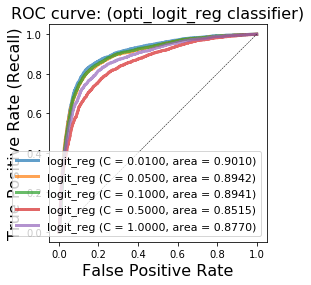

Wall time: 46min 43s


In [223]:
%%time
for c in [0.01,0.05,0.1,0.5,1]:#iterating using maxdepth
    logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight="balanced",dual=True).fit(x_train_final, y_train_final)
    y_score_logit_reg = logit_reg.predict_proba(x_test_final)
    fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test_final, y_score_logit_reg[:,1])
    roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
    accuracy_logit_reg = logit_reg.score(x_test_final, y_test_final)
    print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
    plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(c,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (opti_logit_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [231]:
%%time
#optimised adaboosted tree training
logit_reg = LogisticRegression(penalty = 'l2', C = 0.01,class_weight=None,dual=True).fit(x_train_final, y_train_final)
y_score_logit_reg = logit_reg.predict_proba(x_test_final)
fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test_final, y_score_logit_reg[:,1])
roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
accuracy_logit_reg = logit_reg.score(x_test_final, y_test_final)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Wall time: 6min 30s


C= 0.0500  accuracy = 0.9877   AUC = 0.8707


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


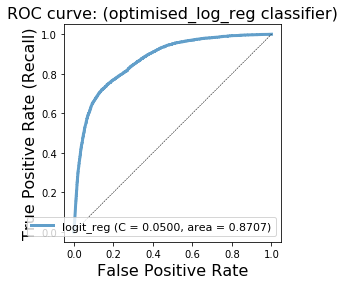

In [232]:
print("C= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.05, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(0.05,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_log_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.0602 


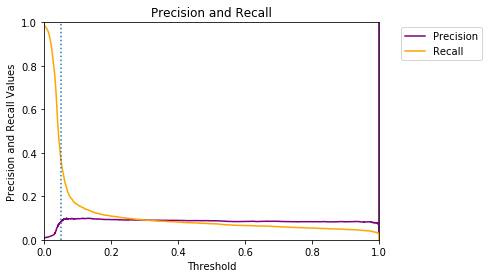

In [235]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test_final, y_score_logit_reg[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [237]:
y_prob_test=pd.DataFrame(y_score_logit_reg[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.04 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          538422  36365   574787
1            1857   2337     4194
__all__    540279  38702   578981


# Xgboost

#### For Full Data

In [308]:
#loading Libraries
from xgboost import XGBClassifier
import xgboost
import xgboost as xgb
from sklearn.cross_validation import train_test_split

In [309]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [341]:
%%time
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)
pred1_class = train_model1.predict(X_test)
pred2_class = train_model2.predict(X_test)
pred1 = train_model1.predict_proba(X_test)
pred2 = train_model2.predict_proba(X_test)

Wall time: 12min 29s


In [342]:
fpr_xg, tpr_xg, _ = roc_curve(y_test, pred1[:,1])
roc_auc_xg = auc(fpr_xg, tpr_xg)
accuracy_xg= train_model1.score(X_test, y_test)
print(" AUC = {:.4f} accuracy={:.4f}".format(roc_auc_xg,accuracy_xg))

 AUC = 0.9370 accuracy=0.9927


In [343]:
fpr_xg, tpr_xg, _ = roc_curve(y_test, pred2[:,1])
roc_auc_xg = auc(fpr_xg, tpr_xg)
accuracy_xg= train_model2.score(X_test, y_test)
print(" AUC = {:.4f} accuracy={:.4f}".format(roc_auc_xg,accuracy_xg))

 AUC = 0.9547 accuracy=0.9929


Average precision score: 0.2667 


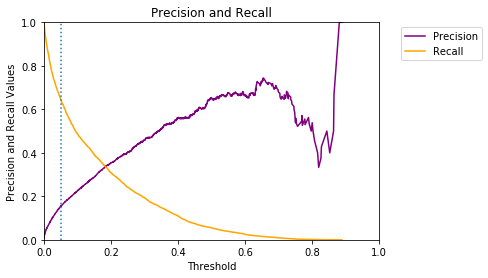

In [344]:
precision, recall, thresholds = precision_recall_curve(y_test, pred2[:,1])
average_precision = average_precision_score(y_test, pred2[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [345]:
y_prob_test=pd.DataFrame(pred2[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          559962  14825   574787
1            1485   2709     4194
__all__    561447  17534   578981


In [346]:
#prediction and Classification Report
from sklearn.metrics import classification_report
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1_class) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2_class) * 100))

Accuracy for model 1: 99.27
Accuracy for model 2: 99.29


<b>For Feature Selected data

In [347]:
%%time
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
train_model = model1.fit(x_train_final, y_train_final)
pred_class = train_model1.predict(x_test_final)
pred = train_model.predict_proba(x_test_final)

Wall time: 2min 24s


In [348]:
fpr_xg, tpr_xg, _ = roc_curve(y_test_final, pred[:,1])
roc_auc_xg = auc(fpr_xg, tpr_xg)
accuracy_xg= train_model.score(x_test_final, y_test_final)
print(" AUC = {:.4f} accuracy={:.4f}".format(roc_auc_xg,accuracy_xg))

 AUC = 0.9330 accuracy=0.9928


Average precision score: 0.1826 


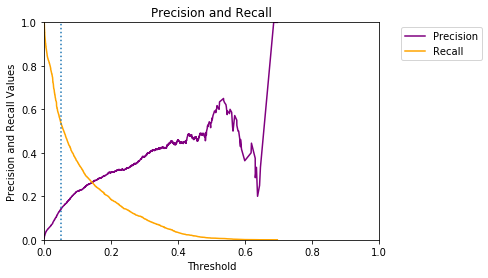

In [349]:
precision, recall, thresholds = precision_recall_curve(y_test_final, pred[:,1])
average_precision = average_precision_score(y_test_final, pred[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [350]:
y_prob_test=pd.DataFrame(pred[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.05 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          560936  13851   574787
1            1931   2263     4194
__all__    562867  16114   578981
